<a href="https://colab.research.google.com/github/DeVaraoG/lectures/blob/master/DZ3_SimonovAV_Crisp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality**

# 1. Цель

Оценка качества вина по его характеристикам

## 1.2. Описание

Data Set Information:

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

https://www.kaggle.com/datasets/rajyellow46/wine-quality?select=winequalityN.csv

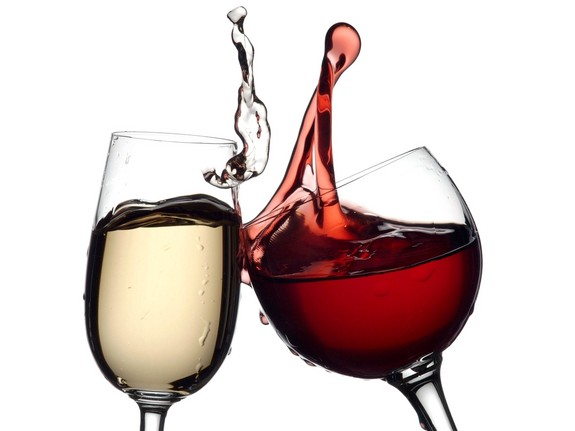

# 2. Data Understanding

## 2.1. Загрузка библиотек

In [1]:
# Импорт библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2. Загрузка данных

In [2]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2.3. Статистика

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Описание переменных**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 3. Data Preprocessing

In [ ]:
# Проверка на пустые значения
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## 3.1. Заполнение пропущенных значений

Заполнение пропущенных значений средними, т.к. пропусков очень мало

In [4]:
# fixed acidity 
mean = df["fixed acidity"].mean()
df["fixed acidity"].fillna(mean, inplace = True)
df["fixed acidity"].isnull().sum()

0

In [5]:
mean = df["volatile acidity"].mean()
df["volatile acidity"].fillna(mean, inplace = True)
df["volatile acidity"].isnull().sum()

0

In [6]:
mean = df["citric acid"].mean()
df["citric acid"].fillna(mean,inplace=True)
df["citric acid"].isnull().sum()

0

In [7]:
mean = df["residual sugar"].mean()
df["residual sugar"].fillna(mean,inplace=True)
df["residual sugar"].isnull().sum()

0

In [8]:
mean = df["chlorides"].mean()
df["chlorides"].fillna(mean,inplace=True)
df["chlorides"].isnull().sum()

0

In [9]:
mean = df["pH"].mean()
df["pH"].fillna(mean,inplace=True)
df["pH"].isnull().sum()

0

In [10]:
mean = df["sulphates"].mean()
df["sulphates"].fillna(mean,inplace=True)
df["sulphates"].isnull().sum()

0

In [11]:
df.isnull().sum()
# Проверка, что нет пустых значений

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 3.2. Графики и проверка на выбросы

[]

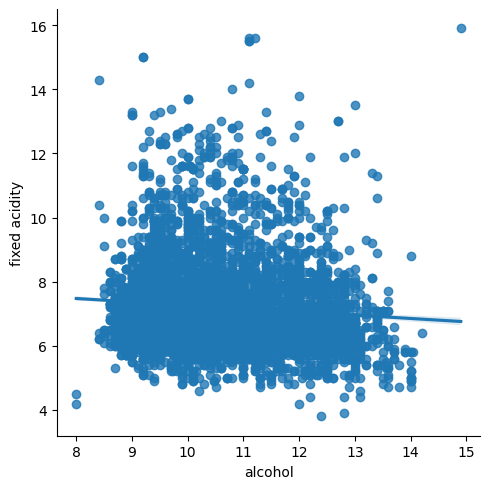

In [ ]:
sns.lmplot(x = "alcohol", y = "fixed acidity", data = df)
plt.plot()

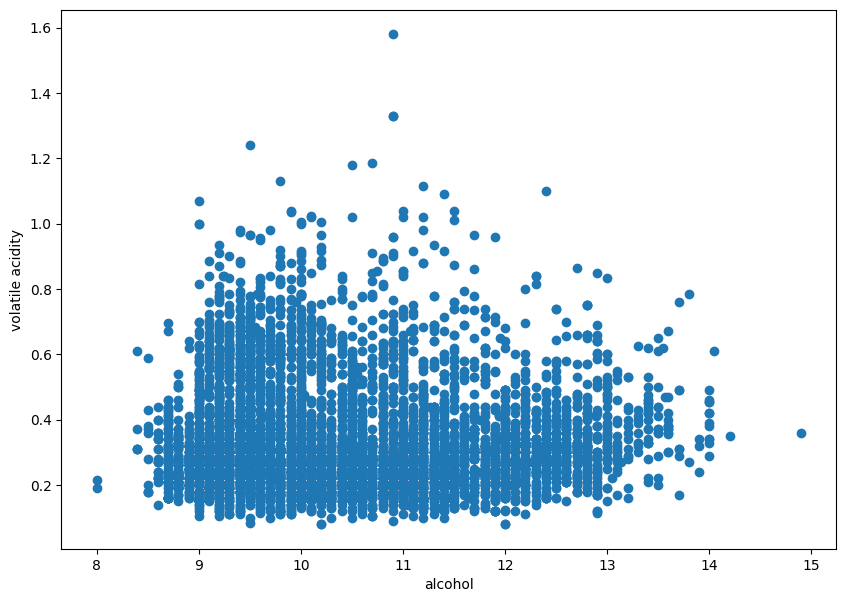

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(x = "alcohol", y = "volatile acidity", data = df)
plt.xlabel("alcohol")
plt.ylabel("volatile acidity")
plt.show()
# Явных выбросов нет

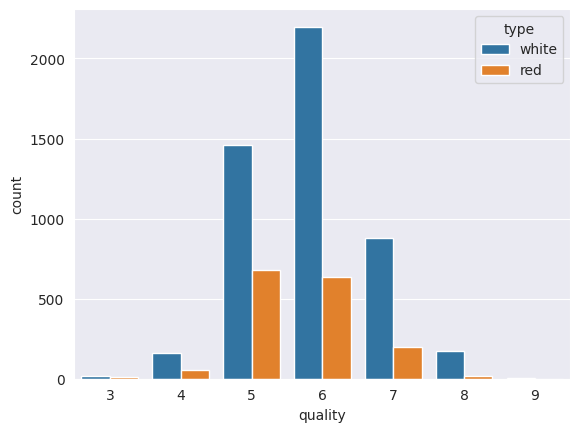

In [ ]:
sns.set_style(style="darkgrid") 
sns.countplot(x = "quality",hue="type", data = df) 
plt.show()

<Figure size 1000x700 with 0 Axes>

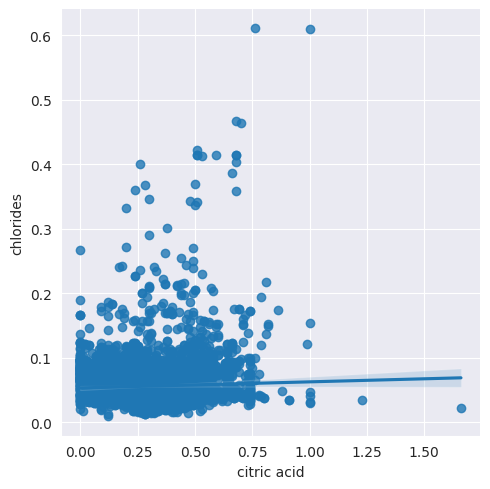

In [ ]:
plt.figure(figsize=(10,7))
sns.lmplot(x = "citric acid", y = "chlorides", data = df)
plt.show()

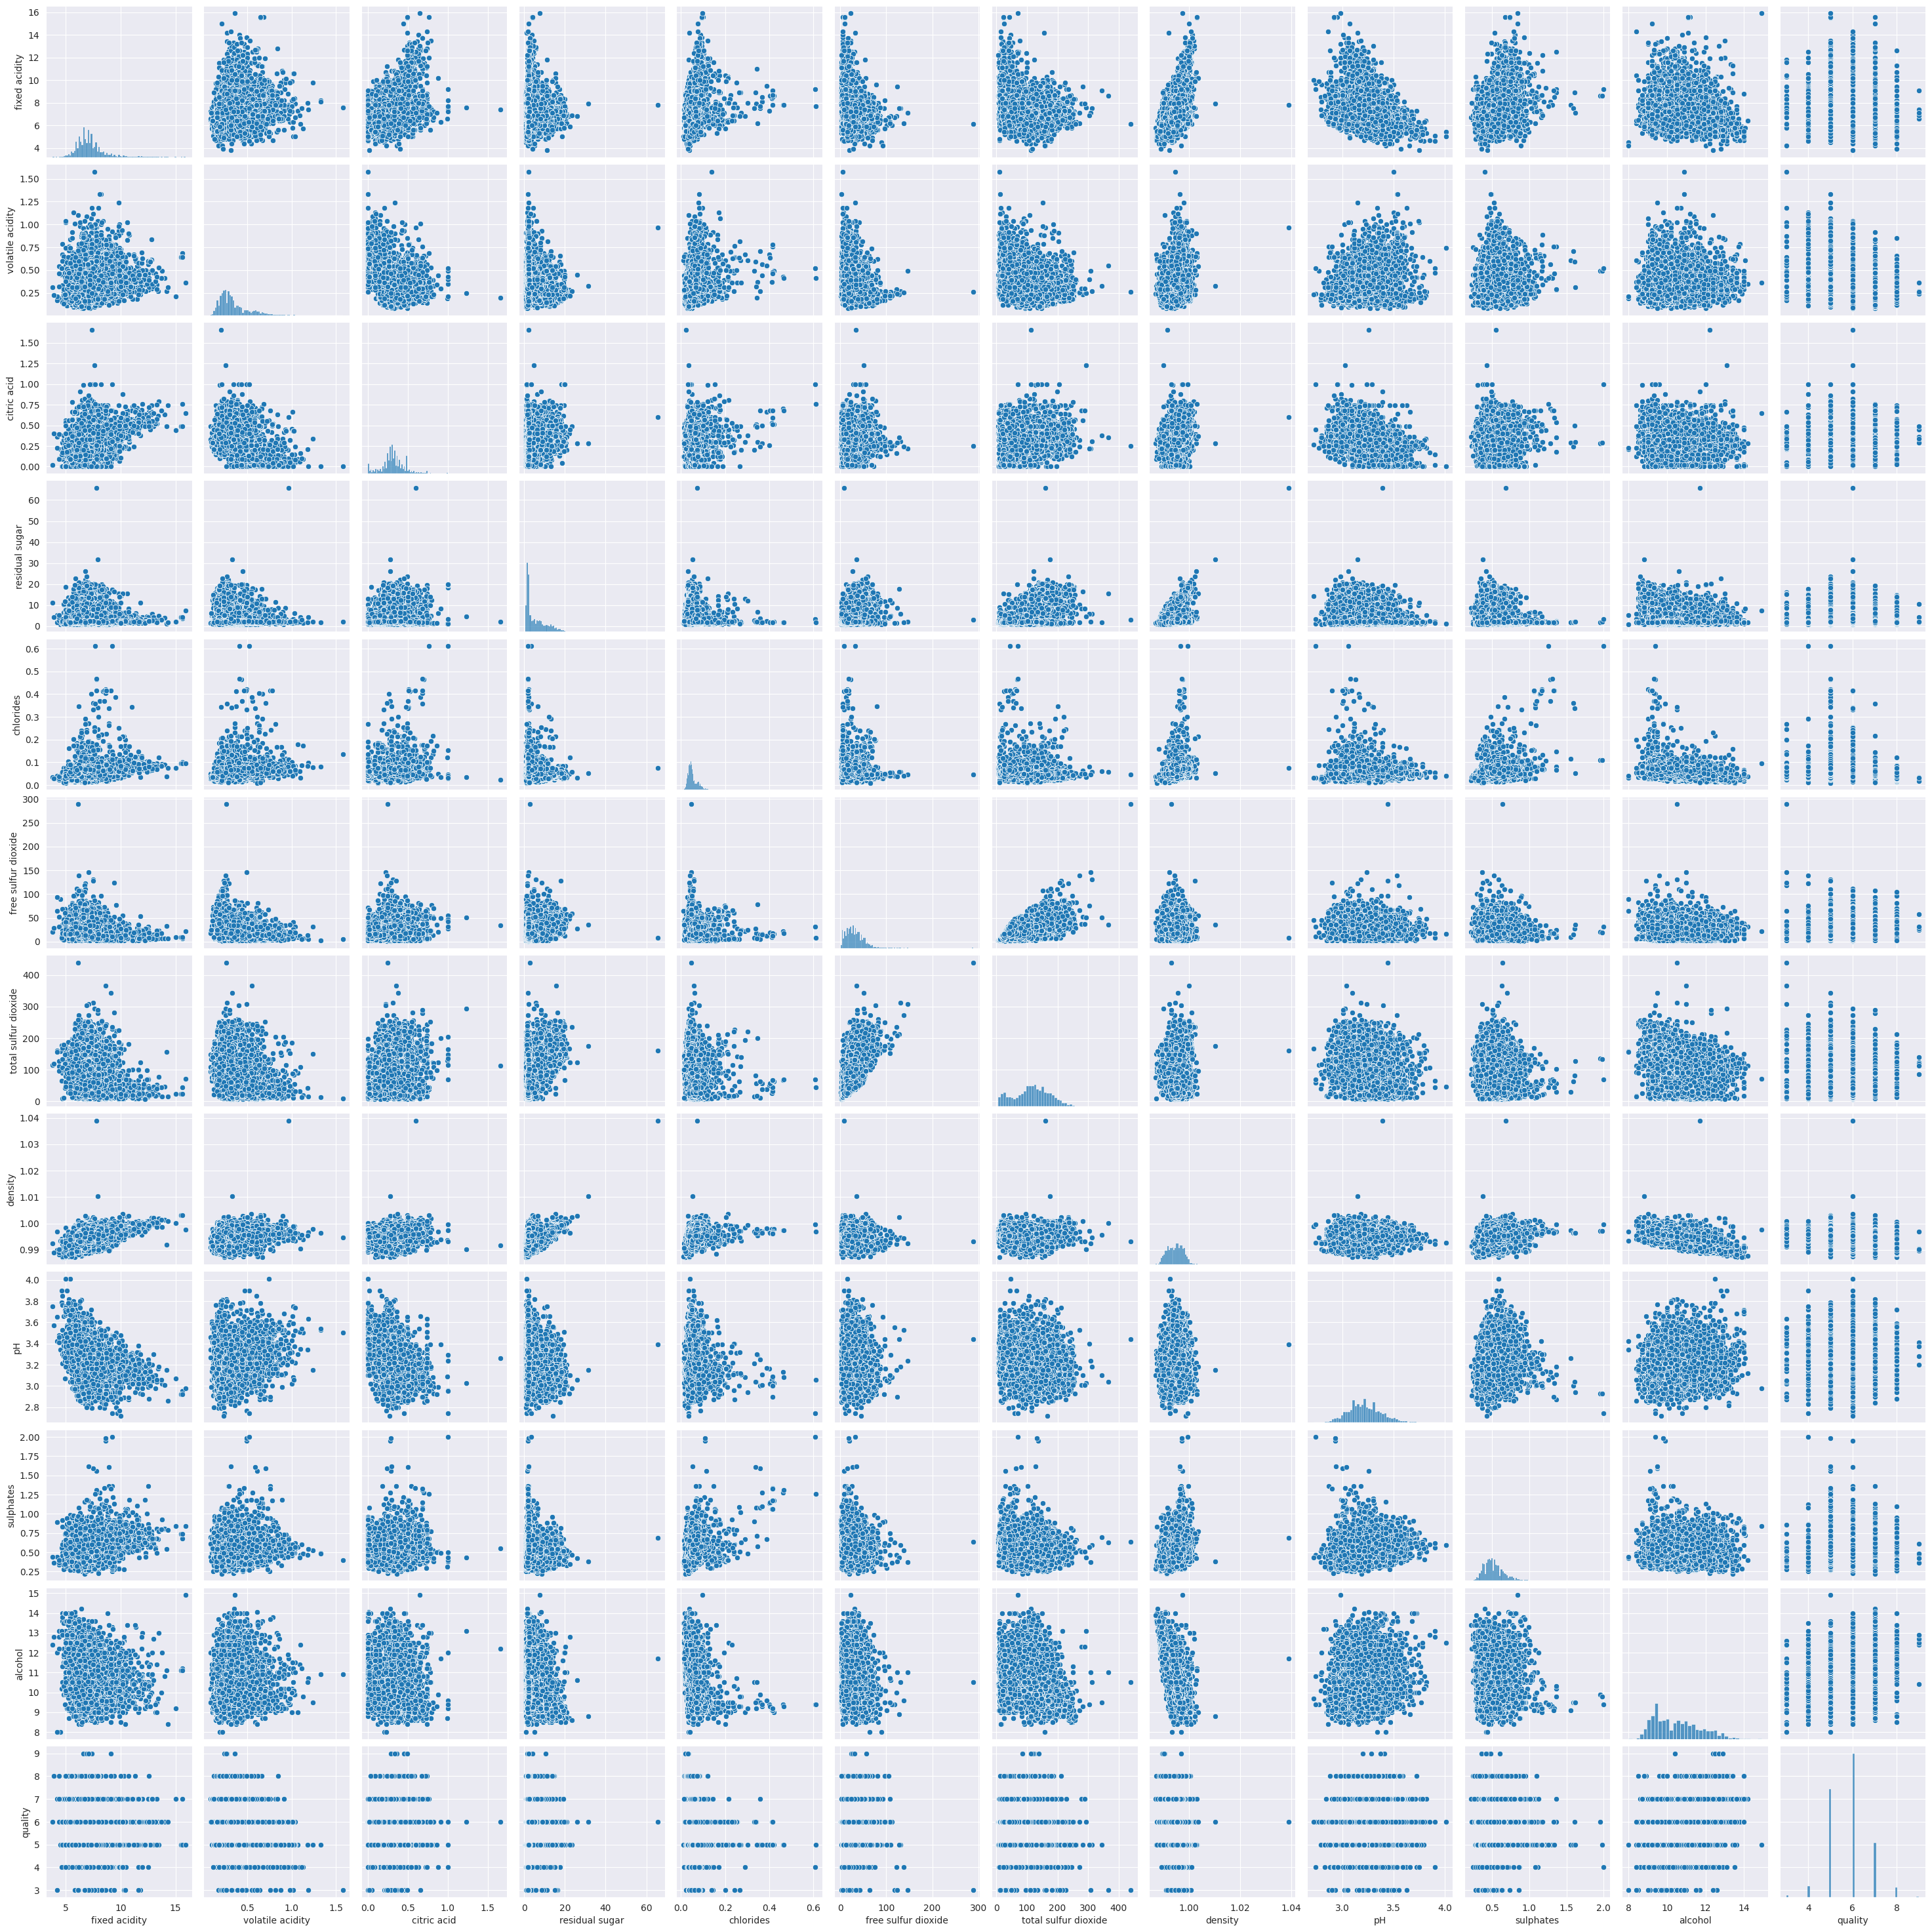

In [ ]:
sns.pairplot(df)
plt.show()

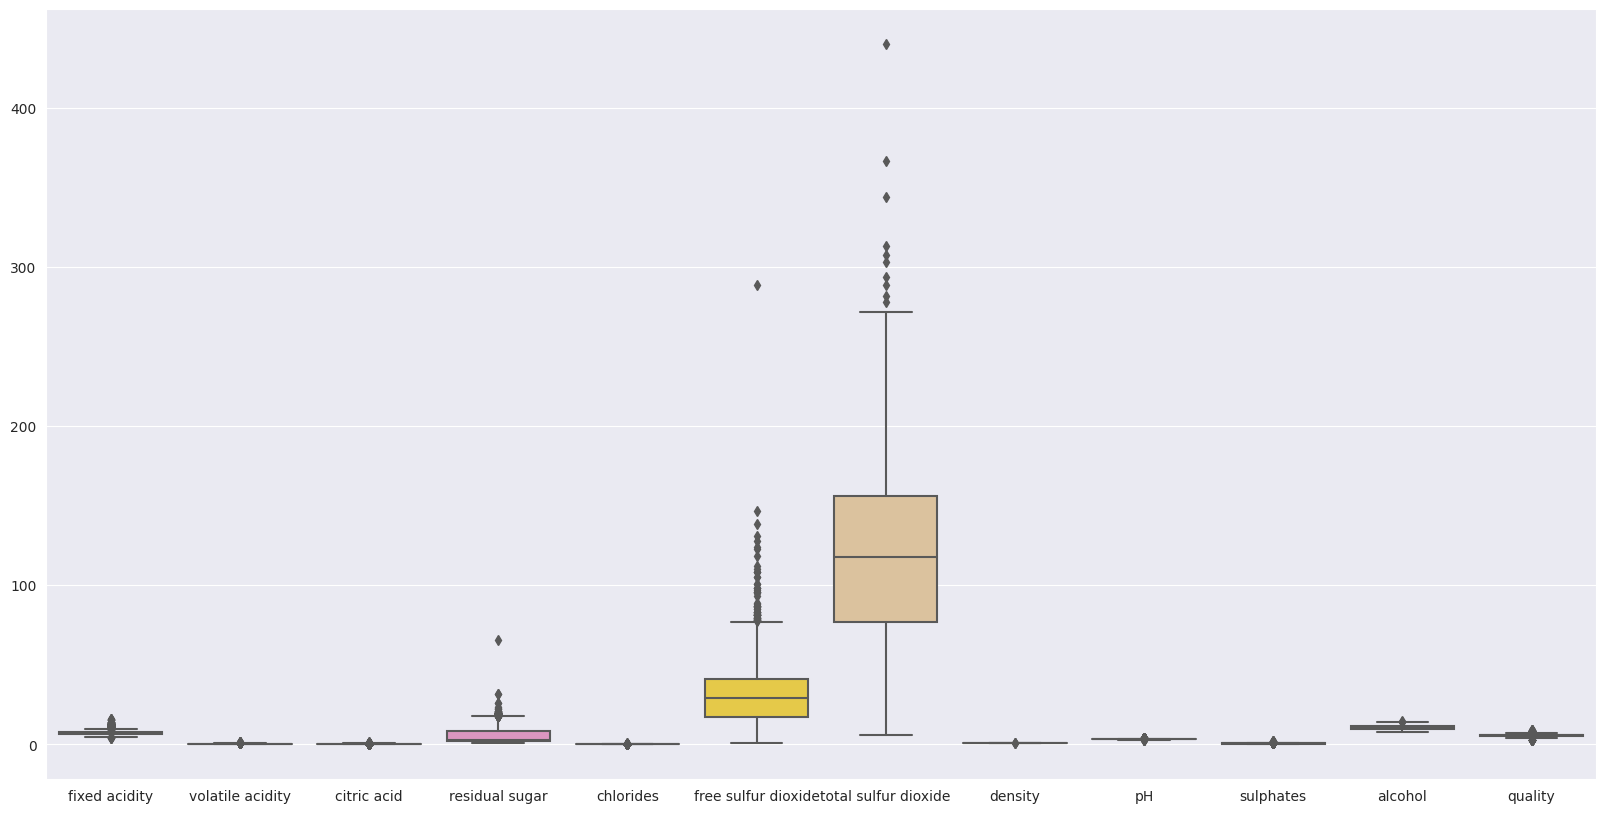

In [ ]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df, palette = "Set2")
plt.show()

## 3.3. Преобразование категориальных переменных в числовые

Преобразование Type

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"]) # type = 0 или 1 вместо white / red

In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Преобразование Quality в меньшее число занчений

In [33]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [34]:
quality_map = {3 : "Low",4 : "Low", 5 : "Medium", 6 : "Medium", 7 : "Medium", 8 : "High", 9 : "High"}
df["quality"] = df["quality"].map(quality_map)

In [35]:
df.quality.value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

In [36]:
map_quality = {"Low" : 0, "Medium" : 1, "High" : 2}
df["quality"] = df["quality"].map(map_quality)

In [37]:
df.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

In [38]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


## 3.4. Сборка датасета для моделирования

In [45]:
X = df.drop("quality", axis = True)
y = df["quality"]

Выбор переменных

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X, y)

ExtraTreesClassifier()

In [47]:
print(etc.feature_importances_)

[0.00785664 0.08591464 0.1090809  0.08229884 0.08582807 0.08385179
 0.10788827 0.08774103 0.0820143  0.08497391 0.08922988 0.09332173]


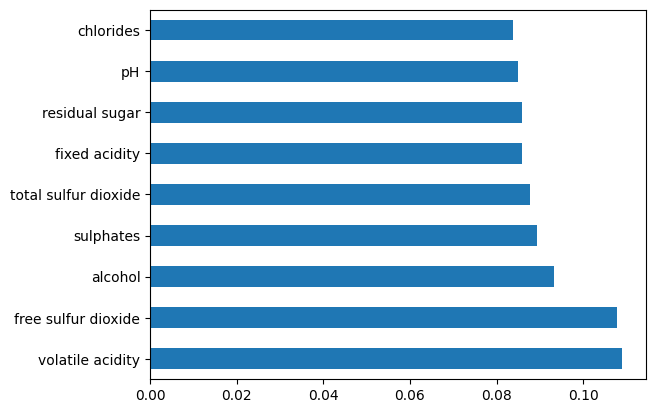

In [48]:
feature_importances = pd.Series(etc.feature_importances_, index = X.columns)
feature_importances.nlargest(9).plot(kind = "barh")
plt.show()

Нет явно неважных переменных

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# 4. Моделирование

## 4.1. Выбор модели

Выбор через перебор по GridSearch

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:
model_params = {
    "svm" : {
        "model" : SVC(gamma = "auto"),
        "params" :{
            'C' : [1, 10, 15, 20],
            'kernel' : ["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
        
    },
    
     "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
}

In [52]:
score = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 10, return_train_score= False)
    clf.fit(X, y)
    score.append({
        "Model" : model_name,
        "Best_Score" : clf.best_score_,
        "Best_Params" : clf.best_params_
    })

In [53]:
df_result = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [54]:
df_result

,Model,Best_Score,Best_Params
0,svm,0.931507,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.923656,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.931661,"{'max_depth': 5, 'n_estimators': 10}"
3,naive_bayes,0.756317,{}
4,logistic_regression,0.932122,{'C': 5}


Наилучший результат показала модель Random Forest. Обучим и проверим не тесте.

## 4.2 Обучение модели

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth = 5, n_estimators = 10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

# 5. Оценка

In [57]:
y_pred = clf_forest.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9307692307692308


# 6. Развертывание
Развертывание в данном означает публикацию результатов.

In [59]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [61]:
print(accuracy_dataframe.shape)
print(accuracy_dataframe.head())
accuracy_dataframe.to_csv( 'wine_pred.csv' , index = False )

(1300, 2)
      y_test  y_pred
5316       1       1
5210       1       1
3518       1       1
1622       1       1
2443       1       1
